In [53]:
#Importem pandas i numpy
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [54]:
dataset_name= 'thyroidDF'
df = pd.read_csv(f'data/{dataset_name}.csv')

In [55]:
print(df.dtypes)
df.head()

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
referral_source         object
target                  object
patient_id               int64
dtype: object


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [56]:
boolean_columns = df.columns[df.isin(['t', 'f']).all()]
df[boolean_columns] = df[boolean_columns].applymap(lambda x: 1 if x == 't' else 0)

df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,0,0,0,0,0,0,0,1,...,NaN,0,NaN,0,NaN,0,NaN,other,-,840801013
1,29,F,0,0,0,0,0,0,0,0,...,128.0,0,NaN,0,NaN,0,NaN,other,-,840801014
2,41,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,11.0,other,-,840801042
3,36,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,26.0,other,-,840803046
4,32,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,36.0,other,S,840803047


In [57]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [58]:
hyperthyroid = {'A', 'B', 'C', 'D'}
hypothyroid = {'E', 'F', 'G', 'H'}

def classify_diagnosis(diagnosis):
    
    letters = set(diagnosis.replace('|', ''))
    if letters & hyperthyroid:
        return 2
    
    if letters & hypothyroid:
        return 0
    
    return 1

df['target'] = df['target'].apply(classify_diagnosis)
df['target'].unique()

array([1, 0, 2], dtype=int64)

In [59]:
nan_percentage = df.isna().mean()
nan_columns = nan_percentage[nan_percentage > 0]
nan_columns

sex    0.033471
TSH    0.091801
T3     0.283908
TT4    0.048190
T4U    0.088203
FTI    0.087440
TBG    0.961949
dtype: float64

In [60]:
df['referral_source'].unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'], dtype=object)

In [61]:
dummies_referral_source = pd.get_dummies(df['referral_source'], dtype='int',drop_first=False)
df = pd.concat([df, dummies_referral_source], axis=1)
df = df.drop(['referral_source','other'], axis="columns")

In [62]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FTI,TBG_measured,TBG,target,patient_id,STMW,SVHC,SVHD,SVI,WEST
0,29,F,0,0,0,0,0,0,0,1,...,NaN,0,NaN,1,840801013,0,0,0,0,0
1,29,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,1,840801014,0,0,0,0,0
2,41,F,0,0,0,0,0,0,0,0,...,NaN,1,11.0,1,840801042,0,0,0,0,0
3,36,F,0,0,0,0,0,0,0,0,...,NaN,1,26.0,1,840803046,0,0,0,0,0
4,32,F,0,0,0,0,0,0,0,0,...,NaN,1,36.0,1,840803047,0,0,0,0,0


In [63]:
df['age'].nsmallest(5)

456     1
1142    1
1267    1
1921    1
3300    1
Name: age, dtype: int64

In [64]:
df['age'].nlargest(5)

8105    65526
6392    65512
5710    65511
2976      455
790        97
Name: age, dtype: int64

In [65]:
df = df[df['age'] < 100]


In [66]:
# Omplir NaNs de 'sexe' amb 'F' si 'pregnant' és 1
df.loc[(df['sex'].isna()) & (df['pregnant'] == 1), 'sex'] = 'F'

In [67]:
dummies_sex = pd.get_dummies(df['sex'], dtype='int',drop_first=True)
df = pd.concat([df, dummies_sex], axis=1)
df = df.drop(['sex'], axis="columns")
df.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,TBG_measured,TBG,target,patient_id,STMW,SVHC,SVHD,SVI,WEST,M
0,29,0,0,0,0,0,0,0,1,0,...,0,NaN,1,840801013,0,0,0,0,0,0
1,29,0,0,0,0,0,0,0,0,0,...,0,NaN,1,840801014,0,0,0,0,0,0
2,41,0,0,0,0,0,0,0,0,1,...,1,11.0,1,840801042,0,0,0,0,0,0
3,36,0,0,0,0,0,0,0,0,0,...,1,26.0,1,840803046,0,0,0,0,0,0
4,32,0,0,0,0,0,0,0,0,0,...,1,36.0,1,840803047,0,0,0,0,0,0


In [68]:
nan_percentage = df.isna().mean()
nan_columns = nan_percentage[nan_percentage > 0]
nan_columns

TSH    0.091841
T3     0.283922
TT4    0.048211
T4U    0.088242
FTI    0.087478
TBG    0.961933
dtype: float64

In [69]:
mesures = ['TSH_measured', 'T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
valors = ['TSH', 'T3','TT4','T4U','FTI', 'TBG']
for i in range(len(mesures)):
    no_mesured = df[df[mesures[i]] == 0]
    is_theory_correct = no_mesured[valors[i]].isna().all()
    print(is_theory_correct)


True
True
True
True
True
True


In [70]:
df.drop(['patient_id','TBG']+mesures,axis='columns', inplace=True)
for i in range(len(valors[:-1])):
    print(df[valors[i]].min(), df[valors[i]].max())

0.005 530.0
0.05 18.0
2.0 600.0
0.17 2.33
1.4 881.0


In [71]:
df_fill_na = df
df_fill_na[valors[:-1]] = df_fill_na[valors[:-1]].fillna(0)
df_fill_na.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,TT4,T4U,FTI,target,STMW,SVHC,SVHD,SVI,WEST,M
0,29,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,1,0,0,0,0,0,0
1,29,0,0,0,0,0,0,0,0,0,...,128.0,0.0,0.0,1,0,0,0,0,0,0
2,41,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,1,0,0,0,0,0,0
3,36,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1,0,0,0,0,0,0
4,32,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1,0,0,0,0,0,0


In [72]:
df_fill_na.dropna(inplace=True)

In [73]:
print(df_fill_na['target'].value_counts())

target
1    8260
0     667
2     241
Name: count, dtype: int64


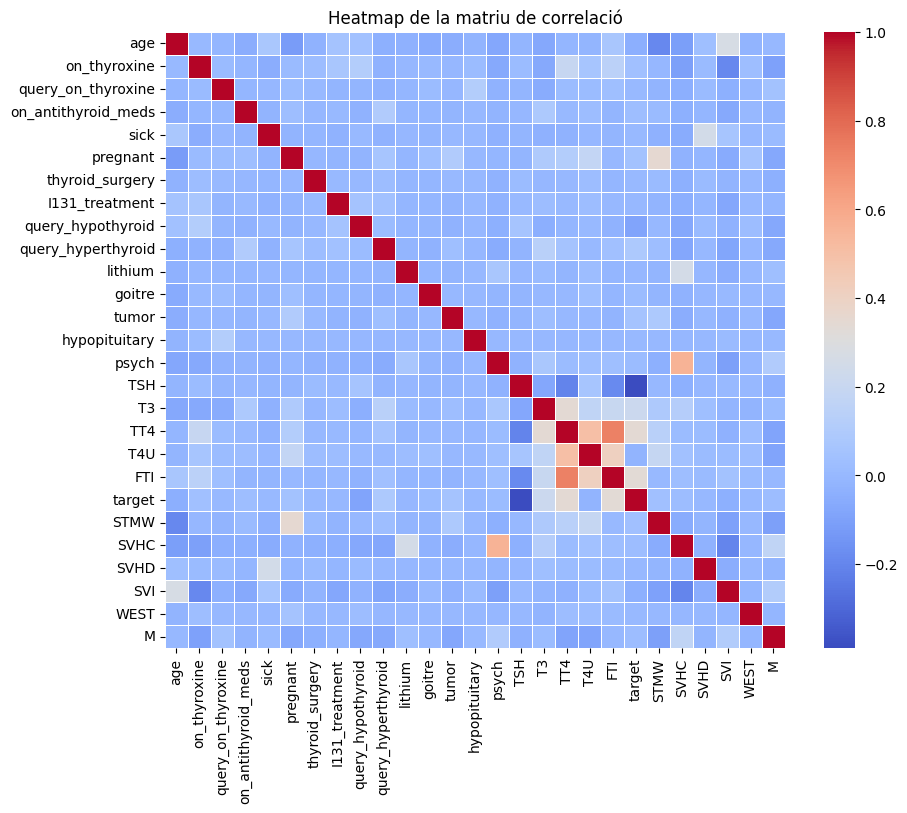

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Calcular la matriu de correlació i mostrar un heatmap sense anotacions
correlation_matrix = df_fill_na.corr(method='pearson', min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5) 
plt.title('Heatmap de la matriu de correlació')
plt.show()

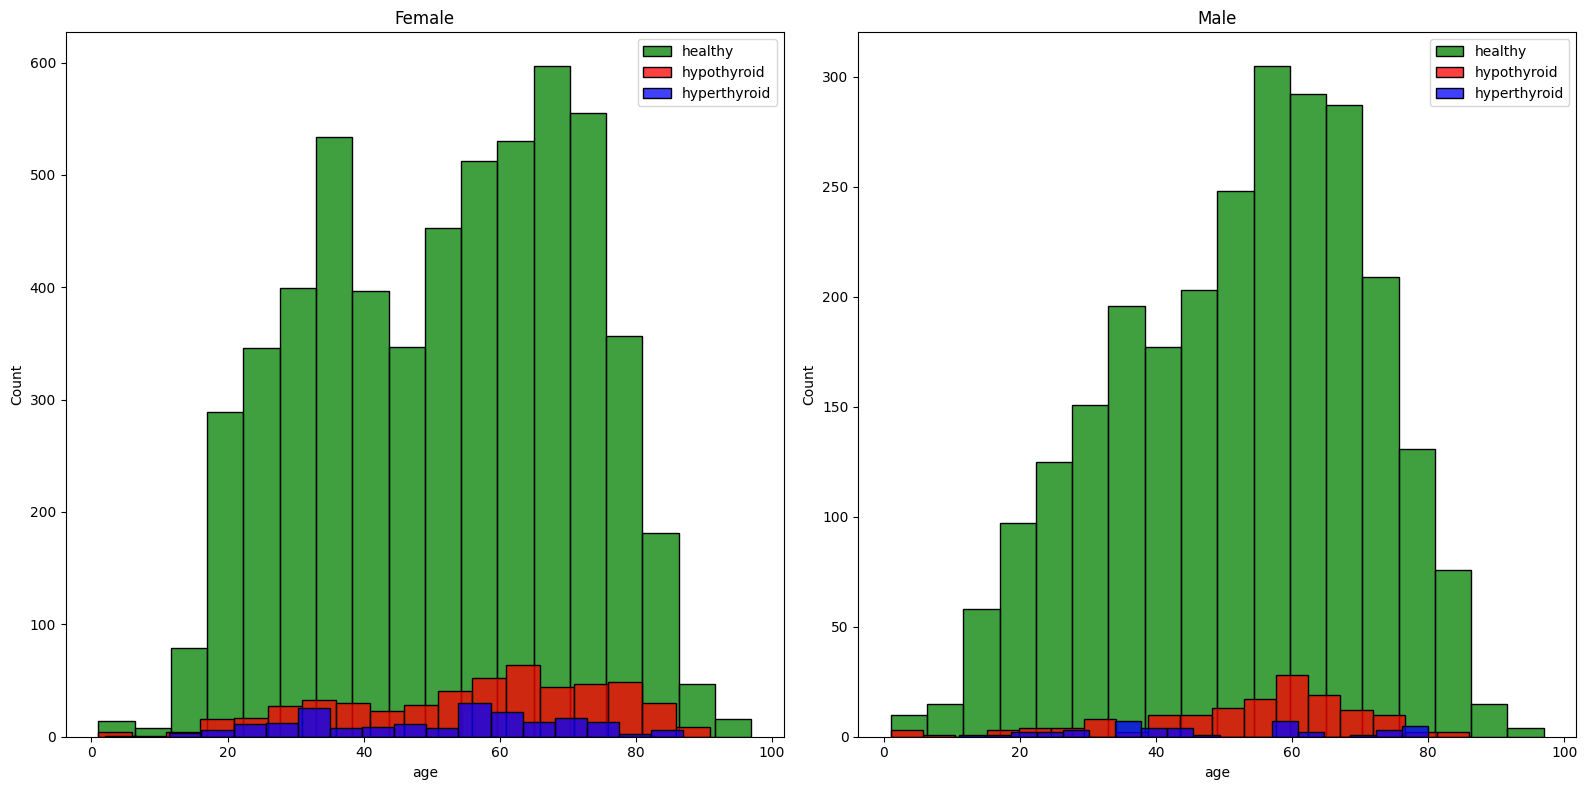

In [75]:
# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Filtrar dades per sexe
women = df_fill_na[df_fill_na['M'] == 0]
men = df_fill_na[df_fill_na['M'] == 1]

# Colors i targets
targets_numeric = [1,0,2]
colors = ['green', 'red', 'blue']
target_categorical=['healthy','hypothyroid','hyperthyroid']

# Subplot per a dones
for n, color,c in zip(targets_numeric, colors,target_categorical):
    sns.histplot(
        data=women[women['target'] == n],
        x="age",
        bins=18,
        label=c,
        ax=axes[0],
        color=color,
        kde=False
    )
axes[0].legend()
axes[0].set_title('Female')

# Subplot per a homes
for n, color,c in zip(targets_numeric, colors,target_categorical):
    sns.histplot(
        data=men[men['target'] == n],
        x="age",
        bins=18,
        label=c,
        ax=axes[1],
        color=color,
        kde=False
    )
axes[1].legend()
axes[1].set_title('Male')

# Mostrar la gràfica
plt.tight_layout()
plt.show()


In [76]:
from sklearn.model_selection import train_test_split
target_att = 'target'
attributes = [k for k in df.keys() if k!= target_att]
X = df_fill_na[attributes]
y = df_fill_na[[target_att]]
X_train_val_fillna, X_test_fillna, y_train_val_fillna, y_test_fillna = train_test_split(X, y, test_size=0.1, random_state=42)

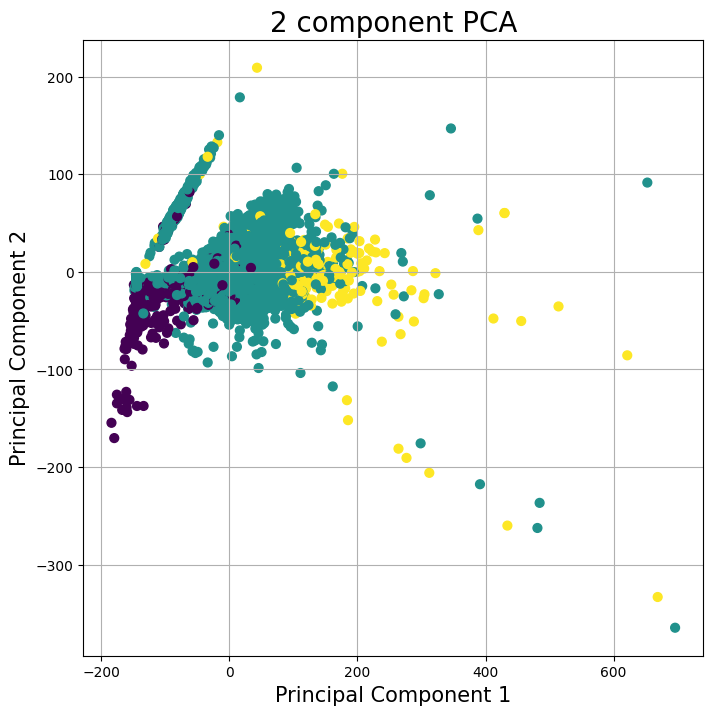

In [77]:
from sklearn.decomposition import PCA

# Provem PCA amb 2 components
pca = PCA(n_components=2)
y_pca = np.array(y_train_val_fillna)
X_data_pca_2 = pca.fit_transform(X_train_val_fillna)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(X_data_pca_2[:,0], X_data_pca_2[:,1],c = y_pca[:], s = 40, cmap='viridis')
ax.grid()

In [78]:
from sklearn.linear_model import LogisticRegression

from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(X_train_val_fillna, y_train_val_fillna, test_size=0.2, random_state=42)
ovo_model = OneVsOneClassifier(LogisticRegression())
ovo_model.fit(X_train, y_train)
y_pred = ovo_model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)

print(f1_score(y_val,y_pred,average='macro'))
print(accuracy_score(y_val,y_pred))
print("Matriu de confusió:\n", cm)




0.6741655603665683
0.9388249545729861
Matriu de confusió:
 [[  46   59    0]
 [  10 1489    6]
 [   0   26   15]]


In [79]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

def classificacio_per_defecte(X,y,PRC,it,base_classifiers):

    acc_r=np.zeros((it,len(base_classifiers),2))
    random_state=20
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PRC,random_state=random_state*(i+1))
        for j, model in enumerate(base_classifiers.values()):
            ovo = OneVsOneClassifier(model)
            ovr = OneVsRestClassifier(model)
            ovo.fit(X_train,y_train)
            ovr.fit(X_train,y_train)
            yhat_ovo=ovo.predict(X_test)
            yhat_ovr=ovr.predict(X_test)
            acc_r[i][j][0] = f1_score(y_test, yhat_ovo,average='macro')
            acc_r[i][j][1] = f1_score(y_test, yhat_ovr, average='macro')

    return acc_r




In [80]:
def save_df(acc_r,name_dataset):
    models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVC', 'KNN','XGBoost']

    data_for_saving = []

    for j in range(acc_r.shape[1]):  
        for k in range(acc_r.shape[2]):  
            for i in range(acc_r.shape[0]):  
                precisio = acc_r[i, j, k]
                
                data_for_saving.append({
                    'Model': models[j],
                    'Tipus': 'OVR' if k == 1 else 'OVO',
                    'Mostra': i + 1,  
                    'Precisio': precisio
                })

    df_results = pd.DataFrame(data_for_saving)

    df_results.to_csv(f'resultats_per_model_default_{name_dataset}.csv', index=False)

In [81]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

random_state=20
base_classifiers = {
    'Logistic Regression': LogisticRegression(random_state=random_state),
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state),
    'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),
    'SVC': SVC(kernel='linear', random_state=random_state),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(random_state=random_state)
}
PRC = 0.3
#f1_dfna = classificacio_per_defecte(X_train_val_fillna,y_train_val_fillna,PRC,10,base_classifiers)
#save_df(f1_dfna,'df_fillna')
f1_dfna = pd.read_csv('resultats_per_model_default_df_fillna.csv')

In [82]:
def plot_data(acc_r):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=acc_r, x="Model", y="Precisio", hue="Tipus")
    plt.title("Comparativa de f1_score per Model i Tipus")
    plt.ylabel("f1_score")
    plt.xlabel("Model")
    plt.legend(title="Tipus")
    plt.show()

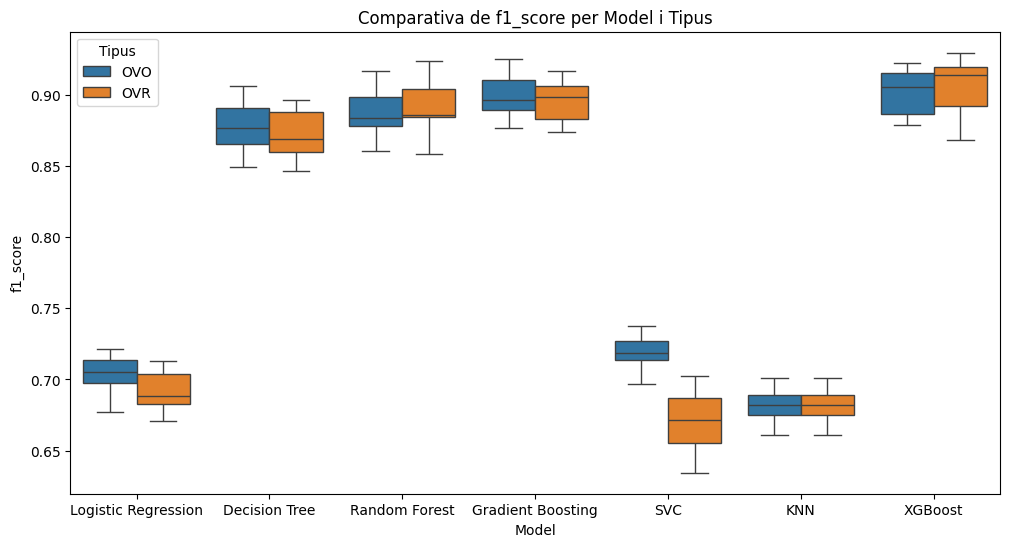

In [83]:
plot_data(f1_dfna)

In [84]:
# Paràmetres pel Logistic Regressor
lr_param_grid = {
    'random_state' : [random_state],  
    'penalty' : ['l2', 'l1'], 
    'solver' : ['lbfgs', 'liblinear'],  
    'C' : [0.01, 0.1, 1.0, 10.0, 100.0],
}


# Paràmetres pel DTC
dtc_param_grid = {'random_state' : [random_state],
                  'criterion' : ['gini'],
                  'max_depth' : [None, 3, 5, 7, 10],
                  'min_samples_leaf' : [1, 5, 10], 
                  'min_samples_split' : [2, 5, 10],
                  'max_features': [None, 1, 2, 3, 4]}

# Paràmetres pel RFC
rfc_param_grid = {'random_state': [random_state],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [None, 2, 3, 4],
                  'max_depth': [None, 10, 20, 30],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'class_weight': [None, 'balanced'],
}

# Paràmetres pel GBC
gbc_param_grid = {
    'random_state': [random_state], 
    'loss': ['exponential'],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Paràmetres pel SVC
svc_param_grid = {'random_state' : [random_state],
                  'C' : [0.5, 1.0, 2.0, 4.0],
                  'gamma' : ['auto'],
                  'kernel' : ['rbf', 'linear', 'poly', 'sigmoid'],
                  'shrinking' : [True, False]}

# Paràmetres pel KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}

# Paràmetres pel XGBoost
xgb_param_grid = {
    'random_state': [random_state],
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'max_depth': [3, 5, 7, 10], 
    'min_child_weight': [1, 3, 5],  
    'subsample': [0.6, 0.8, 1.0],  
}

param_grid_list = {
    'Logistic Regression': lr_param_grid, 
    'Decision Tree': dtc_param_grid, 
    'Random Forest': rfc_param_grid, 
    'Gradient Boosting': gbc_param_grid,
    'SVC': svc_param_grid, 
    'KNN': knn_param_grid,
    'XGBoost': xgb_param_grid
}

In [85]:
classifiers_dfna = {
    'Logistic Regression': LogisticRegression(random_state=random_state),
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'XGBoost': XGBClassifier(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state),
    'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [86]:
import time
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer

def cerca_hyperparametres(X,y,base_classifiers,splits,dataset_name):
    random_state = 42

    kfold = StratifiedKFold(n_splits=splits, random_state=random_state, shuffle=True)

    for name, model in base_classifiers.items():
        results = []

        start_time = time.time()

        param_grid_ovr = {f'estimator__{key}': value for key, value in param_grid_list[name].items()}

        ovr_model = OneVsRestClassifier(model)
        gs_ovr = GridSearchCV(estimator=ovr_model, param_grid=param_grid_ovr, cv=kfold, 
                            scoring=make_scorer(f1_score, average='macro'), n_jobs=-1)
        gs_ovr.fit(X, y)
        mean_f1_best_model_ovr = gs_ovr.best_score_
        best_params_ovr = gs_ovr.best_params_

        ovo_model = OneVsOneClassifier(model)
        gs_ovo = GridSearchCV(estimator=ovo_model, param_grid=param_grid_ovr, cv=kfold, 
                            scoring=make_scorer(f1_score, average='macro'), n_jobs=-1)
        gs_ovo.fit(X, y)
        mean_f1_best_model_ovo = gs_ovo.best_score_
        best_params_ovo = gs_ovo.best_params_

        end_time = time.time()
        calc_time = end_time - start_time

        results.append({
            'Classifier': name,
            'Strategy': 'OVR',  
            'Mean Test Score (F1)': mean_f1_best_model_ovr,
            'Execution Time (s)': calc_time,  
            'Best Parameters': best_params_ovr,
            'Best Estimator': gs_ovr.best_estimator_  
        })
        results.append({
            'Classifier': name,
            'Strategy': 'OVO',  
            'Mean Test Score (F1)': mean_f1_best_model_ovo,
            'Execution Time (s)': calc_time,  
            'Best Parameters': best_params_ovo,
            'Best Estimator': gs_ovo.best_estimator_  
        })

        print(f'Classifier: {type(model).__name__}, OVR Mean Test Score: {mean_f1_best_model_ovr:.4f}, OVO Mean Test Score: {mean_f1_best_model_ovo:.4f}, Time: {calc_time:.2f}s')

        results_df = pd.DataFrame(results)
        results_df.to_csv(f'{name}_hyperparameters_search_results_{dataset_name}.csv', index=False)


In [87]:
#cerca_hyperparametres(X_train_val_fillna,y_train_val_fillna,10,'df_fillna')

In [88]:
def get_best_model_cerca_hyperparametres(models,dataset_name):
    best_model=LogisticRegression()
    f1=0
    for k,v in models.items():
        l=pd.read_csv(f'{k}_hyperparameters_search_results_{dataset_name}.csv')
        l = l.loc[l['Mean Test Score (F1)'].idxmax()]
        if f1 < float(l['Mean Test Score (F1)']):
            f1=l['Mean Test Score (F1)']
            params = eval(l['Best Parameters']) 
            params = {key.replace('estimator__', ''): value for key, value in params.items()}

            m=v(**params)
            if l['Strategy']=='OVO':
                best_model=OneVsRestClassifier(m)
            else: best_model=OneVsOneClassifier(m)
    return best_model


In [89]:
models_no_init = {
    'Logistic Regression': LogisticRegression,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'Gradient Boosting': GradientBoostingClassifier,
    'KNN': KNeighborsClassifier,
    'XGBoost': XGBClassifier
}

best_model_dfna = get_best_model_cerca_hyperparametres(models_no_init,'df_fillna')

In [90]:
best_model_dfna

OneVsRestClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=10,
                                                     max_features=None,
                                                     min_samples_split=5,
                                                     random_state=20))

In [91]:

def passar_a_intervals(df,hormones,intervals):
    def classificar_h(h,interval):
        if pd.isna(h):  
            return [0, 0, 0, 0, 0, 0]
        elif h < interval[0]:
            return [1, 0, 0, 0, 0, 0]
        elif h < interval[1]:
            return [0, 1, 0, 0, 0, 0]
        elif h < interval[2]:
            return [0, 0, 1, 0, 0, 0]
        elif h < interval[3]:
            return [0, 0, 0, 1, 0, 0]
        elif h < interval[4]:
            return [0, 0, 0, 0, 1, 0]
        else:
            return [0, 0, 0, 0, 0, 1]


    for hormona,interval in zip(hormones,intervals):
        df[[f'{hormona} Molt baix', f'{hormona} Baix', f'{hormona} Normal baix', 
            f'{hormona} Normal alt', f'{hormona} Alt', f'{hormona} Molt alt']] = df[hormona].apply(lambda x: pd.Series(classificar_h(x,interval)))
        df.drop([hormona],axis='columns',inplace=True)
    return df

intervals=[[0.1,0.3,1,2.5,10],
            [0.6,1,1.5,2.5,4],
            [40,60,100,150,200],
            [.6,.8,1,1.4,1.8],
            [5,10,15,20,30]    
]

df_intervals = passar_a_intervals(df.copy(),valors[:-1],intervals)

df_intervals.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,T4U Normal baix,T4U Normal alt,T4U Alt,T4U Molt alt,FTI Molt baix,FTI Baix,FTI Normal baix,FTI Normal alt,FTI Alt,FTI Molt alt
0,29,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,41,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [92]:
attributes = [k for k in df_intervals.keys() if k!= target_att]
X = df_intervals[attributes]
y = df_intervals[[target_att]]
X_train_val_intervals, X_test_intervals, y_train_val_intervals, y_test_intervals = train_test_split(X, y, test_size=0.1, random_state=42)


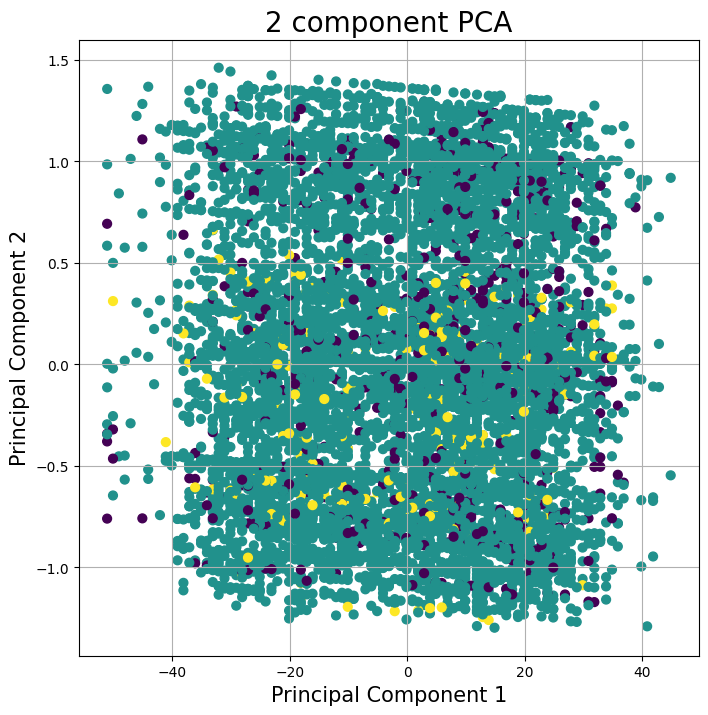

In [93]:
pca = PCA(n_components=2)
y_pca = np.array(y_train_val_intervals)
X_data_pca_2 = pca.fit_transform(X_train_val_intervals)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(X_data_pca_2[:,0], X_data_pca_2[:,1],c = y_pca[:], s = 40, cmap='viridis')
ax.grid()

In [94]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val_intervals, y_train_val_intervals, test_size=0.2, random_state=42)
ovo_model = OneVsOneClassifier(XGBClassifier())
ovo_model.fit(X_train, y_train)
y_pred = ovo_model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)

print(f1_score(y_val,y_pred,average='macro'))
print(accuracy_score(y_val,y_pred))
print("Matriu de confusió:\n", cm)


0.7812423270405552
0.9533615990308903
Matriu de confusió:
 [[  71   34    0]
 [  11 1478   16]
 [   0   16   25]]


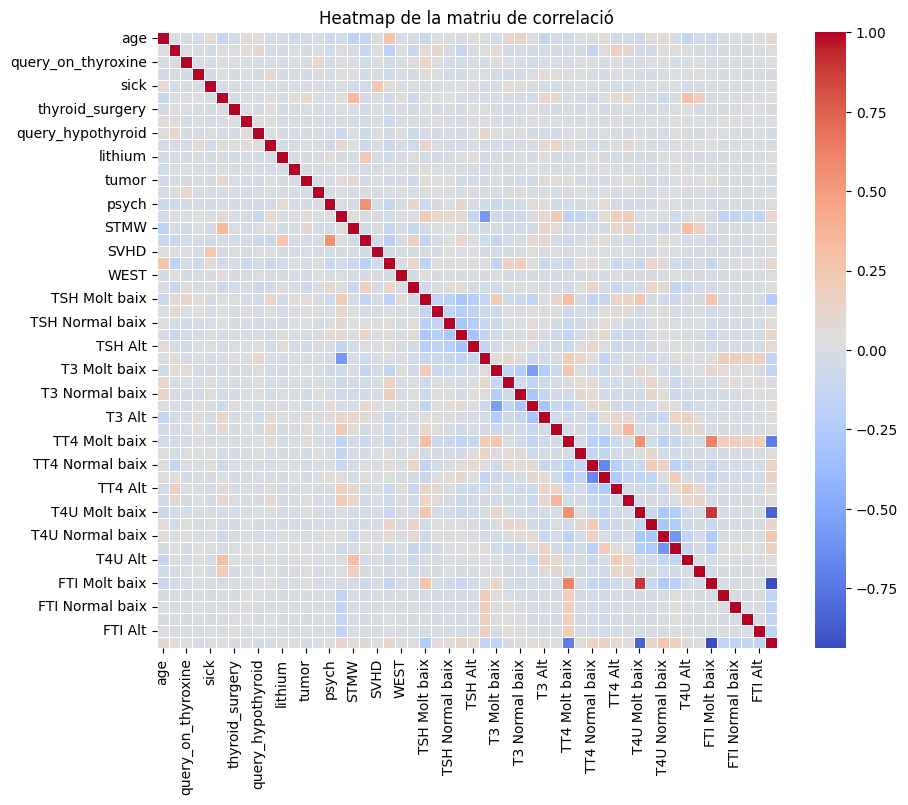

In [95]:
correlation_matrix = df_intervals.corr(method='pearson', min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5) 
plt.title('Heatmap de la matriu de correlació')
plt.show()

In [96]:
random_state=20
base_classifiers = {
    'Logistic Regression': LogisticRegression(random_state=random_state),
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state),
    'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),
    'SVC': SVC(kernel='linear', random_state=random_state),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(random_state=random_state)
}
PRC = 0.3
f1_intervals = classificacio_per_defecte(X_train_val_intervals,y_train_val_intervals,PRC,10,base_classifiers)
save_df(f1_intervals,'df_interval')
f1_intervals = pd.read_csv('resultats_per_model_default_df_interval.csv')

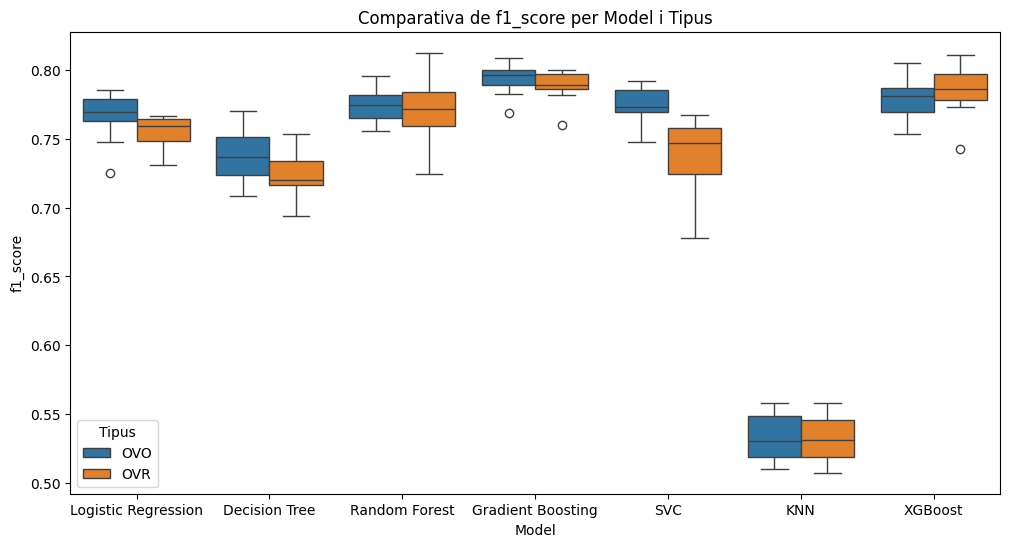

In [97]:
plot_data(f1_intervals)

In [98]:
best_model_dfna.fit(X_train_val_fillna,y_train_val_fillna)
y_pred = best_model_dfna.predict(X_test_fillna)

cm = confusion_matrix(y_test_fillna, y_pred)

print(f1_score(y_test_fillna,y_pred,average='macro'))
print(f1_score(y_test_fillna,y_pred,average='micro'))
print(accuracy_score(y_test_fillna,y_pred))
print("Matriu de confusió:\n", cm)

0.9118377079566052
0.9836423118865867
0.9836423118865867
Matriu de confusió:
 [[ 62   2   0]
 [  4 823   7]
 [  0   2  17]]
